In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [39]:
#Se placer dans le repertoire du projet
%cd /content/gdrive/My Drive/Projets/Segmentation_Images_Microscopie_Electronique

/content/gdrive/My Drive/Projets/Segmentation_Images_Microscopie_Electronique


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2
from PIL import Image
import nibabel

## Conversion tiff to png

In [ ]:
path_project_directory = os.getcwd()+'/data_seg'

def converting_tiff_to_png(path_project_directory):
  for folders in os.listdir(path_project_directory):
      path_folder = os.path.join(path_project_directory, folders)
      for image in os.listdir(path_folder):
          if image[-3:] != 'tif':
              pass
          else:
              image_path = os.path.join(path_folder, image)
              im = cv2.imread(image_path, 0)
              im = cv2.resize(im, (256, 256))
              im = im.reshape(256, 256, 1)
              new_image_path = os.path.join(path_folder ,image.split('.')[0]+'.png')
              cv2.imwrite(new_image_path, im)

#converting_tiff_to_png(path_project_directory)

## Data Augmentation

Pour la data augmentation, nous faisons le choix d'utiliser le module skimage. Nous aurions également pu utiliser ImageDataGenerator() de Keras, cependant cette méthode nous limite. En effet, lors de l'utilisation de cette fonction, seul les images modifiées sont utilisées pour l'entrainement et non les originales.   

In [46]:
import random
import skimage
from skimage import io
from skimage import transform

In [52]:
# Affine l'image
def affine_transform(image_array):
  tf = transform.AffineTransform(shear=-0.2)
  return transform.warp(image_array, tf, order=1, preserve_range=True, mode='wrap')

# Flip l'image horizontalement
def horizontal_flip(image_array):
    return image_array[:, ::-1]

# Parcours les dossier d'images, appliques les deux transformations à chaque image et les enregistre.
def data_aug():
  path_data_directory = os.getcwd()+'/data_seg'
  for folder in os.listdir(path_data_directory):
    if folder == 'test':
      pass
    else:
      print(f'--- Data Augmentation des images {folder} ---')
      path_folder = os.path.join(path_data_directory, folder)
      name = 30
      for i in range(30): 
        print(f'{i}.png - En cours...')
        image_path = os.path.join(path_folder, f"{i}.png")
        image = io.imread(image_path)

        transform_2 = affine_transform(image)
        io.imsave(os.path.join(path_folder, f"{name}.png"), transform_2)
        name += 1

        transform_1 = horizontal_flip(image)
        io.imsave(os.path.join(path_folder, f"{name}.png"), transform_1)
        name += 1
        print(f'{i}.png - OK')

data_aug()

--- Data Augmentation des images label ---
0.png - En cours...
0.png - OK
1.png - En cours...
1.png - OK
2.png - En cours...


2.png - OK
3.png - En cours...
3.png - OK
4.png - En cours...
4.png - OK
5.png - En cours...


5.png - OK
6.png - En cours...
6.png - OK
7.png - En cours...


7.png - OK
8.png - En cours...
8.png - OK
9.png - En cours...
9.png - OK
10.png - En cours...


10.png - OK
11.png - En cours...
11.png - OK
12.png - En cours...
12.png - OK
13.png - En cours...


13.png - OK
14.png - En cours...
14.png - OK
15.png - En cours...


15.png - OK
16.png - En cours...
16.png - OK
17.png - En cours...
17.png - OK
18.png - En cours...


18.png - OK
19.png - En cours...
19.png - OK
20.png - En cours...
20.png - OK
21.png - En cours...


21.png - OK
22.png - En cours...
22.png - OK
23.png - En cours...
23.png - OK
24.png - En cours...


24.png - OK
25.png - En cours...
25.png - OK
26.png - En cours...
26.png - OK
27.png - En cours...


27.png - OK
28.png - En cours...
28.png - OK
29.png - En cours...
29.png - OK
--- Data Augmentation des images train ---
0.png - En cours...
0.png - OK
1.png - En cours...


1.png - OK
2.png - En cours...
2.png - OK
3.png - En cours...
3.png - OK
4.png - En cours...


4.png - OK
5.png - En cours...
5.png - OK
6.png - En cours...
6.png - OK
7.png - En cours...
7.png - OK
8.png - En cours...
8.png - OK
9.png - En cours...
9.png - OK
10.png - En cours...
10.png - OK
11.png - En cours...
11.png - OK
12.png - En cours...


12.png - OK
13.png - En cours...
13.png - OK
14.png - En cours...
14.png - OK
15.png - En cours...


15.png - OK
16.png - En cours...
16.png - OK
17.png - En cours...
17.png - OK
18.png - En cours...
18.png - OK
19.png - En cours...
19.png - OK
20.png - En cours...
20.png - OK
21.png - En cours...
21.png - OK
22.png - En cours...


22.png - OK
23.png - En cours...
23.png - OK
24.png - En cours...
24.png - OK
25.png - En cours...
25.png - OK
26.png - En cours...
26.png - OK
27.png - En cours...
27.png - OK
28.png - En cours...
28.png - OK
29.png - En cours...
29.png - OK


## Import des données

In [53]:
from sklearn.model_selection import train_test_split

def load_dataset():
  path_project_directory = os.getcwd()+'/data_seg'
  dic = {}
  for folders in os.listdir(path_project_directory):
    path_folder = os.path.join(path_project_directory, folders)
    count_image_png = 0
    for i, images in enumerate(os.listdir(path_folder)):
      if images[-3:] != 'png':
        pass
      else:
        count_image_png += 1
    dic[folders] = []
    for i in range(count_image_png):
      image = cv2.imread(os.path.join(path_folder, f'{i}.png'), 0)
      image = np.expand_dims(image, axis=-1)
      dic[folders].append(image)
  X, X_test, y = np.asarray(dic['train']).astype("float32")/255, np.asarray(dic['test']).astype("float32")/255, np.asarray(dic['label']).astype("float32")/255
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  return X_train, X_test, X_val, y_train, y_val

X_train, X_test, X_val, y_train, y_val = load_dataset()

In [54]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(72, 256, 256, 1)
(30, 256, 256, 1)
(18, 256, 256, 1)
(72, 256, 256, 1)
(18, 256, 256, 1)


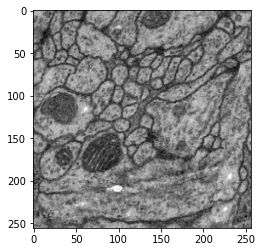

In [55]:
plt.imshow(X_train[0][:,:,0], cmap='gray')

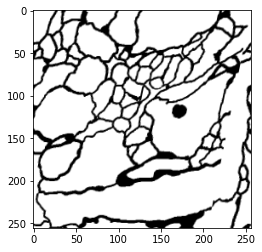

In [56]:
plt.imshow(y_train[0][:,:,0], cmap='gray')

In [57]:
print(X_train[0].shape)

(256, 256, 1)


# Model

Pour le modèle, nous choisissons l'architecture Unet car il peut reconstruire l'image. En raison de ses fonctionnalitées de reconstruction, Unet pourra également générer des images en sortie.

In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Dropout, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [59]:
 # K.set_image_data_format('channels_last')

# def dice_coef(y_true, y_pred):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)


# def dice_coef_loss(y_true, y_pred):
#     return -dice_coef(y_true, y_pred)

In [60]:
def get_unet():
  in1 = Input(shape=(256, 256, 1))

  conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(in1)
  conv1 = Dropout(0.2)(conv1)
  conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv1)
  pool1 = MaxPooling2D((2, 2))(conv1)

  conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool1)
  conv2 = Dropout(0.2)(conv2)
  conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2)
  pool2 = MaxPooling2D((2, 2))(conv2)

  conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool2)
  conv3 = Dropout(0.2)(conv3)
  conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv3)
  pool3 = MaxPooling2D((2, 2))(conv3)

  conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool3)
  conv4 = Dropout(0.2)(conv4)
  conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv4)

  up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
  conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up1)
  conv5 = Dropout(0.2)(conv5)
  conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv5)
  
  up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
  conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
  conv6 = Dropout(0.2)(conv6)
  conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv6)

  up2 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
  conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
  conv7 = Dropout(0.2)(conv7)
  conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
  segmentation = Conv2D(1, (1, 1), activation='sigmoid', name='seg')(conv7)

  model = Model(inputs=[in1], outputs=[segmentation])

  losses = {'seg': 'binary_crossentropy'
          }

  metrics = {'seg': ['accuracy']
              }
  model.compile(optimizer="adam", loss = losses, metrics=metrics)

  return model

model = get_unet()
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_238 (Conv2D)             (None, 256, 256, 32) 320         input_18[0][0]                   
__________________________________________________________________________________________________
dropout_119 (Dropout)           (None, 256, 256, 32) 0           conv2d_238[0][0]                 
__________________________________________________________________________________________________
conv2d_239 (Conv2D)             (None, 256, 256, 32) 9248        dropout_119[0][0]                
___________________________________________________________________________________________

In [61]:
# history = model.fit(datagen.flow(X_train, y_train), batch_size=10, epochs=20, verbose=1, shuffle=True)

model_name = "model_2.h5"

modelcheckpoint = ModelCheckpoint(model_name,
                                  monitor='val_loss',
                                  mode='auto',
                                  verbose=1,
                                  save_best_only=True)

lr_callback = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-10,
    verbose=1,
)

callback_list = [modelcheckpoint, lr_callback]

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=8, verbose=1, shuffle=True, callbacks = callback_list)

Epoch 1/100
9/9 [==============================] - 4s 278ms/step - loss: 0.5298 - accuracy: 0.7046 - val_loss: 0.4530 - val_accuracy: 0.7144

Epoch 00001: val_loss improved from inf to 0.45299, saving model to model_2.h5
Epoch 2/100
9/9 [==============================] - 1s 147ms/step - loss: 0.4393 - accuracy: 0.7189 - val_loss: 0.4534 - val_accuracy: 0.7161

Epoch 00002: val_loss did not improve from 0.45299
Epoch 3/100
9/9 [==============================] - 1s 146ms/step - loss: 0.3698 - accuracy: 0.7417 - val_loss: 0.4798 - val_accuracy: 0.7330

Epoch 00003: val_loss did not improve from 0.45299
Epoch 4/100
9/9 [==============================] - 1s 147ms/step - loss: 0.3424 - accuracy: 0.7691 - val_loss: 0.4206 - val_accuracy: 0.7416

Epoch 00004: val_loss improved from 0.45299 to 0.42064, saving model to model_2.h5
Epoch 5/100
9/9 [==============================] - 1s 148ms/step - loss: 0.3251 - accuracy: 0.7795 - val_loss: 0.3321 - val_accuracy: 0.7804

Epoch 00005: val_loss impr

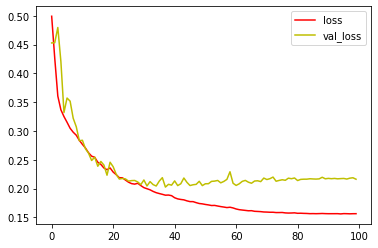

In [62]:
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='y')
plt.legend(['loss', 'val_loss'])
plt.show()

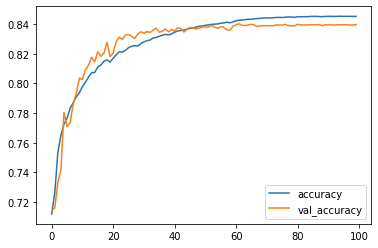

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

Les 2 graphes ci-dessus représente les courbes d'accuracy et loss sur les données d'entrainements et de validations. Nous avons une précision d'environ **84%**.

## Predictions

In [64]:
prediction = model.predict(X_test)

In [65]:
prediction[0].shape

(256, 256, 1)

## Test du modèle

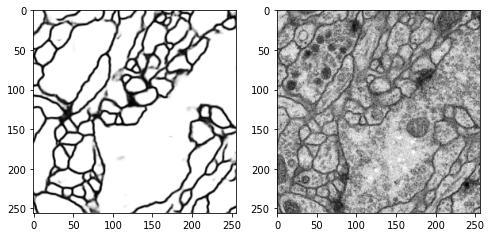

In [66]:
im_true = X_test[0][:,:,0]
im_pred = prediction[0][:,:,0]
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im_pred, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(im_true, cmap='gray')
plt.show()

## Load and use model

In [75]:
model_without_data_aug = get_unet()
model_without_data_aug.load_weights('model.h5')

model_with_data_aug = get_unet()
model_with_data_aug.load_weights('model_2.h5')

predictions_without = model_without_data_aug.predict(X_test)
predictions_with = model_with_data_aug.predict(X_test)

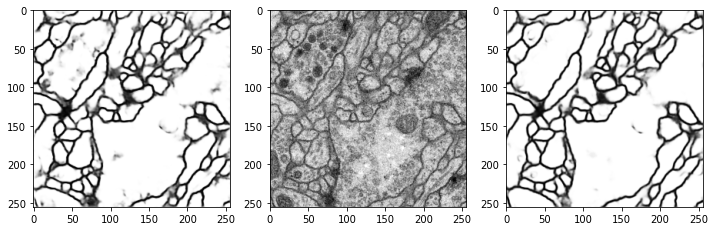

In [76]:
im_true = X_test[0][:,:,0]
im_pred_without = predictions_without[0][:,:,0]
im_pred_with = predictions_with[0][:,:,0]

fig = plt.figure(figsize=(12, 12)) 
fig.add_subplot(i, 3, 1)
plt.imshow(im_pred_without, cmap='gray')
fig.add_subplot(i, 3, 2)
plt.imshow(im_true, cmap='gray')
fig.add_subplot(i, 3, 3)
plt.imshow(im_pred_with, cmap='gray')
plt.show()

La prédiction de gauche est réalisée avec le modèle sans data augmentation contrairement à l'image de droite. Nous pouvons remarquer qu'avec une data augmentation nous obtenons un résulat légèrement plus net.